In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import pandas as pd
import numpy as np

In [3]:
link_listings = 'https://drive.google.com/open?id=12BVI5GdUD54hmM3uZmPWnS6EtmQinV42'

In [4]:
fluff, id = link_listings.split('=')
print (id) # Verify that you have everything after '='

12BVI5GdUD54hmM3uZmPWnS6EtmQinV42


In [5]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('listings.csv')  
listings = pd.read_csv('listings.csv')
listings.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,...,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,...,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,https://www.airbnb.com/rooms/5022,20190912153101,2019-09-13,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,NaN,NaN,NaN,NaN,Please be considerate when staying in the apar...,NaN,NaN,https://a0.muscache.com/im/pictures/feb453bd-f...,NaN,7192,https://www.airbnb.com/users/show/7192,Laura,2009-01-29,"Miami, Florida, United States",I have been a NYer for almost 10 years. I came...,NaN,NaN,NaN,f,https:/

In [6]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 
                'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 
                'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 
                'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
                'host_neighbourhood', 'host_verifications', 'calendar_last_scraped','experiences_offered',
                'host_acceptance_rate','street','city','state','zipcode','country_code','country',
                'is_location_exact','license','jurisdiction_names','is_business_travel_ready','square_feet',
               'weekly_price','monthly_price','last_review','first_review','maximum_nights_avg_ntm','minimum_nights_avg_ntm',
                'maximum_maximum_nights','minimum_maximum_nights','maximum_minimum_nights','minimum_minimum_nights','host_has_profile_pic',
                'has_availability','require_guest_profile_picture', 'require_guest_phone_verification','requires_license','host_total_listings_count', 
                'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

In [7]:
listings = listings.drop(cols_to_drop, axis=1)


In [8]:
listings

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,3647,2008-11-25,a few days or more,0%,f,1.0,t,Harlem,Harlem,Manhattan,New York,"New York, NY",40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,7,37 months ago,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN
1,3831,2008-12-07,within an hour,92%,f,1.0,t,Brooklyn,Clinton Hill,Brooklyn,New York,"Brooklyn, NY",40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,730,3 days ago,1,3,8,192,279,67,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,4.62
2,5022,2009-01-29,NaN,NaN,f,1.0,t,East Harlem,East Harlem,Manhattan,New York,"New York, NY",40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,120,6 months ago,0,0,0,0,9,2,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,0.10
3,5099,2009-02-02,within a day,78%,f,1.0,f,Midtown East,Murray Hill,Manhattan,New York,"New York, NY",40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,21,today,3,3,13,13,75,10,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,0.59
4,5121,2009-02-03,a few days or more,0%,f,1.0,f,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,New York,"Brooklyn, NY",40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,730,20 months ago,0,0,0,0,49,0,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48372,38564068,2018-08-03,within an hour,100%,f,0.0,f,Bedford-Stuyvesant,Cypress Hills,Brooklyn,New York,"Brooklyn, NY",40.67618,-73.90764,Apartment,Entire home/apt,7,2.0,3.0,4.0,Real Bed,"{Wifi,Kitchen,""Smoke detector"",""Carbon monoxid...",$199.00,$100.00,$100.00,4,$50.00,2,10,today,23,42,42,42,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN
48373,38564524,2012-01-04,NaN,NaN,f,0.0,f,Manhattan,Upper East Side,Manhattan,New York,"New York, NY",40.77326,-73.96650,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Elevator,Heating,W...",$175.00,"$5,000.00",$300.00,1,$0.00,30,1125,today,23,53,83,263,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,moderate,NaN
48374,38566777,2017-11-23,NaN,NaN,f,1.0,f,Brooklyn,Bushwick,Brooklyn,New York,"Brooklyn , NY",40.69907,-73.93043,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Gym,Elevator,...",$35.00,NaN,NaN,1,$0.00,30,1125,today,19,49,66,66,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
48375,38567542,2016-04-25,within an hour,100%,f,10.0,f,Crown Heights,Crown Heights,Brooklyn,New York,"Brooklyn, NY",40.66986,-73.93772,House,Private room,4,3.0,1.0,NaN,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",$79.00,NaN,$39.00,1,$15.00,1,365,today,1,17,47,322,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_p

In [9]:
listings.nunique()

id                              48377
host_since                       3641
host_response_time                  4
host_response_rate                 87
host_is_superhost                   2
host_listings_count                83
host_identity_verified              2
neighbourhood                     194
neighbourhood_cleansed            224
neighbourhood_group_cleansed        5
market                             16
smart_location                    319
latitude                        19036
longitude                       14865
property_type                      36
room_type                           4
accommodates                       19
bathrooms                          16
bedrooms                           14
beds                               22
bed_type                            5
amenities                       43809
price                             657
security_deposit                  222
cleaning_fee                      209
guests_included                    16
extra_people

In [10]:
listings.isnull().sum()

id                                  0
host_since                         21
host_response_time              16416
host_response_rate              16416
host_is_superhost                  21
host_listings_count                21
host_identity_verified             21
neighbourhood                      12
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
market                            102
smart_location                      0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          48
bedrooms                           41
beds                               36
bed_type                            0
amenities                           0
price                               0
security_deposit                16924
cleaning_fee                    10234
guests_included                     0
extra_people

In [11]:
df=listings

In [12]:
from datetime import datetime
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2019, 4, 9) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1420.0
Median days as host: 1424.0


In [13]:
df.host_response_time.unique()

array(['a few days or more', 'within an hour', nan, 'within a day',
       'within a few hours'], dtype=object)

In [14]:
df.host_response_time.value_counts()

within an hour        19095
within a few hours     7423
within a day           4545
a few days or more      898
Name: host_response_time, dtype: int64

In [15]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

Null values: 16416
Proportion: 33.9%


In [16]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.394712
unknown               0.339335
within a few hours    0.153441
within a day          0.093950
a few days or more    0.018563
Name: host_response_time, dtype: float64

In [17]:

l=[[word.strip('[" ]') for word in row[1:-1].split(',')] for row in list(df['amenities'])]
#for demonstration, reducing data to 100 rows
l=l[:100]#remove this line to include whole data
cols=set(word for row in l  for word in row)
# cols.remove('')
print(cols)
# new_df=pd.DataFrame(columns=cols)
# for row_idx in range(len(l)):
#     for col in cols:
#         new_df.loc[row_idx,col]=int(col in l[row_idx])
# new_df


{'Extra space around bed', 'Fire extinguisher', 'Bathtub', 'Safety card', 'Essentials', 'Pets allowed', 'Smoking allowed', 'Smoke detector', 'Window guards', 'Lock on bedroom door', 'High chair', 'Self check-in', 'translation missing: en.hosting_amenity_49', 'Dishwasher', 'Fireplace guards', 'Changing table', 'Coffee maker', 'Children’s dinnerware', 'Baby bath', 'Waterfront', 'Keypad', 'Free street parking', 'Paid parking on premises', 'Smart lock', 'Hot water', 'Single level home', 'Building staff', 'Outlet covers', 'Wheelchair accessible', 'Wide entrance', 'Hair dryer', 'Oven', 'Stair gates', 'Breakfast', 'Cooking basics', 'Microwave', 'Garden or backyard', 'Other', 'Cable TV', 'Cat(s)', 'Pool', 'Dryer', 'Iron', 'Wide hallways', 'Dishes and silverware', 'Kitchen', 'Carbon monoxide detector', 'Free parking on premises', 'Crib', 'Flat path to guest entrance', 'Pack ’n Play/travel crib', 'Room-darkening shades', 'Refrigerator', 'Shampoo', 'Pets live on this property', 'Doorman', 'Lockbo

In [18]:
for c in cols:
  print(c)

Extra space around bed
Fire extinguisher
Bathtub
Safety card
Essentials
Pets allowed
Smoking allowed
Smoke detector
Window guards
Lock on bedroom door
High chair
Self check-in
translation missing: en.hosting_amenity_49
Dishwasher
Fireplace guards
Changing table
Coffee maker
Children’s dinnerware
Baby bath
Waterfront
Keypad
Free street parking
Paid parking on premises
Smart lock
Hot water
Single level home
Building staff
Outlet covers
Wheelchair accessible
Wide entrance
Hair dryer
Oven
Stair gates
Breakfast
Cooking basics
Microwave
Garden or backyard
Other
Cable TV
Cat(s)
Pool
Dryer
Iron
Wide hallways
Dishes and silverware
Kitchen
Carbon monoxide detector
Free parking on premises
Crib
Flat path to guest entrance
Pack ’n Play/travel crib
Room-darkening shades
Refrigerator
Shampoo
Pets live on this property
Doorman
Lockbox
Air conditioning
Well-lit path to entrance
Washer
24-hour check-in
Buzzer/wireless intercom
Internet
Firm mattress
BBQ grill
No stairs or steps to enter
Paid parking of

In [19]:
df['amenities']

0        {"Cable TV",Internet,Wifi,"Air conditioning",K...
1        {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2        {Internet,Wifi,"Air conditioning",Kitchen,Elev...
3        {TV,"Cable TV",Internet,Wifi,Kitchen,"Buzzer/w...
4        {Wifi,"Air conditioning",Kitchen,"Pets live on...
                               ...                        
48372    {Wifi,Kitchen,"Smoke detector","Carbon monoxid...
48373    {TV,Wifi,"Air conditioning",Elevator,Heating,W...
48374    {Wifi,"Air conditioning",Kitchen,Gym,Elevator,...
48375    {Wifi,"Air conditioning",Kitchen,"Free street ...
48376    {TV,Wifi,Kitchen,Gym,Heating,"Smoke detector",...
Name: amenities, Length: 48377, dtype: object

In [20]:

df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Game console'), 'Game console'] = 1
df.loc[df['amenities'].str.contains('BBQ grill'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV|Cable TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics|Kitchen|Refrigirator|Stove|Oven|Dishwasher|Dishes|silverware'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Carbon monoxide detector|Smoke detector|Fire extinguisher'), 'Smoked_detection'] = 1
df.loc[df['amenities'].str.contains('parking|Parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Hair dryer|shampoo'), 'Bathroom_amenities'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children|Changing table|child_friendly|Baby|crib|High chair'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('Dryer|Washer|Washer/Dryer'),'Laundry'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Garden|Backyard'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi|Ethernet connection'),'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets live on this property'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safety card|Keypad|Smart lock|Lock|Buzzer'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
df.loc[df['amenities'].str.contains('Pool'), 'pool'] = 1
df.loc[df['amenities'].str.contains('Heating'), 'Heating'] = 1
df.loc[df['amenities'].str.contains('Falt path to guest entrance|Wheelchair|No staris or steps|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Well-lit path to entrance'), 'well_lit_entrance'] = 1
df.loc[df['amenities'].str.contains('Essentials'), 'essentials'] = 1
df.loc[df['amenities'].str.contains('Indoor fireplace'), 'indoor_fireplace'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [21]:
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi|'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [22]:
list_amm = list(df.columns[47:])
list_amm

['check_in_24h',
 'air_conditioning',
 'Game console',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 'cooking_basics',
 'Smoked_detection',
 'parking',
 'Bathroom_amenities',
 'child_friendly',
 'Laundry',
 'elevator',
 'gym',
 'outdoor_space',
 'host_greeting',
 'internet',
 'long_term_stays',
 'pets_allowed',
 'private_entrance',
 'secure',
 'self_check_in',
 'smoking_allowed',
 'event_suitable',
 'pool',
 'Heating',
 'accessible',
 'well_lit_entrance',
 'essentials',
 'indoor_fireplace']

In [23]:
df_zero_new_amm = df[47:].fillna(0)
df_zero_new_amm

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,host_days_active,check_in_24h,air_conditioning,Game console,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,Smoked_detection,parking,Bathroom_amenities,child_friendly,Laundry,elevator,gym,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,event_suitable,pool,Heating,accessible,well_lit_entrance,essentials,indoor_fireplace
47,13808,2009-11-14 00:00:00,within an hour,100%,f,3.0,t,Brooklyn,Bedford-Stuyvesant,Brooklyn,New York,"Brooklyn, NY",40.68043,-73.93934,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$80.00,0,$35.00,4,$0.00,1,365,2 days ago,2,16,32,296,121,17,93.0,10.0,9.0,10.0,...,9.0,9.0,f,strict_14_with_grace_period,1.07,3433.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48,14287,2009-11-20 00:00:00,within an hour,100%,f,1.0,f,Manhattan,Upper West Side,Manhattan,New York,"New York, NY",40.78635,-73.97008,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$151.00,$0.00,$110.00,1,$50.00,3,8,a week ago,0,0,4,109,80,43,92.0,10.0,9.0,10.0,...,10.0,9.0,t,strict_14_with_grace_period,0.68,3427.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49,14290,2009-11-20 00:00:00,within a few hours,88%,f,4.0,f,Williamsburg,Williamsburg,Brooklyn,New York,"Brooklyn, NY",40.70420,-73.93560,Loft,Entire home/apt,2,1.0,2.0,0.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Breakfast,""Free stre...",$228.00,$350.00,$128.00,2,$10.00,3,60,2 weeks ago,16,34,64,154,84,13,94.0,10.0,9.0,10.0,...,9.0,9.0,t,strict_14_with_grace_period,0.71,3427.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50,14314,2009-11-21 00:00:00,within a few hours,100%,f,2.0,t,Brooklyn,Greenpoint,Brooklyn,New York,"Brooklyn, NY",40.73506,-73.95392,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$149.00,$250.00,$55.00,2,$5.00,2,30,4 days ago,2,6,23,275,349,90,97.0,10.0,10.0,10.0,...,10.0,9.0,f,strict_14_with_grace_period,2.94,3426.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51,14322,2009-11-21 00:00:00,unknown,0,f,1.0,t,Kips Bay,Kips Bay,Manhattan,New York,"New York, NY",40.73961,-73.98074,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$200.00,"$1,000.00",$150.00,2,$60.00,7,30,4 months ago,0,11,41,316,19,3,95.0,9.0,9.0,9.0,...,10.0,9.0,t,strict_14_with_grace_period,0.21,3426.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [24]:
col_name = ['Game console','bbq','nature_and_views','internet','smoking_allowed','pool','event_suitable','indoor_fireplace']


df_zero_new_amm = df_zero_new_amm.drop(columns = col_name,axis = 1)
    
  

In [25]:
for col in df_zero_new_amm.columns:
  print(df_zero_new_amm[col].value_counts(normalize = True) * 100)

11667455    0.002069
24304881    0.002069
13477118    0.002069
37382011    0.002069
14716155    0.002069
              ...   
20015736    0.002069
17109623    0.002069
19274358    0.002069
26664580    0.002069
5695055     0.002069
Name: id, Length: 48330, dtype: float64
2018-10-08    0.835920
2016-12-16    0.527623
2017-06-27    0.297952
2015-03-30    0.250362
2016-03-03    0.250362
                ...   
2010-05-11    0.002069
2009-11-27    0.002069
2012-01-11    0.002069
2009-10-25    0.002069
2011-01-05    0.002069
Name: host_since, Length: 3625, dtype: float64
within an hour        39.472377
unknown               33.958204
within a few hours    15.340368
within a day           9.379268
a few days or more     1.849783
Name: host_response_time, dtype: float64
100%    43.314711
0       33.958204
90%      3.136768
80%      1.640803
97%      1.464929
          ...    
23%      0.002069
11%      0.002069
18%      0.002069
28%      0.002069
16%      0.002069
Name: host_response_rate, Leng

In [26]:
df_new_final = df_zero_new_amm

In [27]:
df_new_final.dtypes

id                      int64
host_since             object
host_response_time     object
host_response_rate     object
host_is_superhost      object
                       ...   
self_check_in         float64
Heating               float64
accessible            float64
well_lit_entrance     float64
essentials            float64
Length: 73, dtype: object

In [28]:
# security_deposit                 object
# cleaning_fee                     object
# host_since                       object

In [29]:
df_new_final[['security_deposit','price','host_since']]

,security_deposit,price,host_since
47,0,$80.00,2009-11-14 00:00:00
48,$0.00,$151.00,2009-11-20 00:00:00
49,$350.00,$228.00,2009-11-20 00:00:00
50,$250.00,$149.00,2009-11-21 00:00:00
51,"$1,000.00",$200.00,2009-11-21 00:00:00
...,...,...,...
48372,$100.00,$199.00,2018-08-03 00:00:00
48373,"$5,000.00",$175.00,2012-01-04 00:00:00
48374,0,$35.00,2017-11-23 00:00:00
48375,0,$79.00,2016-04-25 00:00:00


In [30]:
df_new_final.price = df_new_final.price.str[1:-3]
df_new_final.price = df_new_final.price.str.replace(",", "")
df_new_final.price = df_new_final.price.astype('int64')

In [31]:
df_new_final.security_deposit = df_new_final.security_deposit.str[1:-3]
df_new_final.security_deposit = df_new_final.security_deposit.str.replace(",", "")
df_new_final.security_deposit.fillna(0, inplace=True)

In [32]:
df_new_final.cleaning_fee = df_new_final.cleaning_fee.str[1:-3]
df_new_final.cleaning_fee = df_new_final.cleaning_fee.str.replace(",", "")
df_new_final.cleaning_fee.fillna(0, inplace=True)


In [33]:
df_new_final[['cleaning_fee']]

,cleaning_fee
47,35
48,110
49,128
50,55
51,150
...,...
48372,100
48373,300
48374,0
48375,39


In [34]:
col = ['beds','bathrooms', 'bedrooms']

In [35]:
for c in col:
  df_new_final[c].fillna(df_new_final[c].median(),inplace = True)

In [36]:
df_new_final.bed_type.value_counts()

Real Bed         47575
Futon              283
Pull-out Sofa      242
Airbed             161
Couch               69
Name: bed_type, dtype: int64

In [37]:
df_new_final.drop('bed_type', axis=1, inplace=True)

In [38]:
df_new_final.drop('calendar_updated', axis=1, inplace=True)

In [39]:
df_new_final.cancellation_policy.value_counts()

strict_14_with_grace_period    21922
flexible                       15069
moderate                       11186
super_strict_60                  107
strict                            24
super_strict_30                   22
Name: cancellation_policy, dtype: int64

In [40]:
df_new_final.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

In [41]:

df_new_final.cancellation_policy.value_counts()

strict_14_with_grace_period    22075
flexible                       15069
moderate                       11186
Name: cancellation_policy, dtype: int64

In [42]:
df_new_final.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

In [43]:
df.property_type.value_counts()

Apartment                 38144
House                      3944
Townhouse                  1624
Condominium                1512
Loft                       1375
Serviced apartment          437
Guest suite                 382
Hotel                       219
Boutique hotel              214
Other                       115
Bed and breakfast            72
Guesthouse                   57
Resort                       56
Hostel                       54
Bungalow                     37
Villa                        33
Tiny house                   21
Aparthotel                   15
Camper/RV                    13
Boat                         12
Cottage                       7
Tent                          6
Earth house                   5
Houseboat                     5
Cave                          2
Bus                           2
Farm stay                     2
Cabin                         2
Casa particular (Cuba)        2
Barn                          2
Dome house                    1
Island  

In [44]:

df_new_final.property_type.replace({
    'Townhouse': 'House',
    'Condominium': 'Apartment',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Aparthotel': 'Apartment',
    'Guest suite': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House' 
    }, inplace=True)


In [45]:
# Replacing other categories with 'other'
df_new_final.loc[~df_new_final.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [46]:
df_new_final.property_type.value_counts()

Apartment    41826
House         5665
Other          839
Name: property_type, dtype: int64

In [47]:
# df[['availability_30','availability_60','availability_90','availability_365']]
# df.columns
df_new_final.drop(['availability_30','availability_60','availability_90'], axis=1, inplace=True)

In [48]:
df_new_final.columns

Index(['id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'market', 'smart_location', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'host_days_active', 'check_in_24h', 'air_conditioning', 'balcony',
       'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics',
       'Smoked_detection', 'p

In [49]:
df_new_final[['neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed']]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
47,Brooklyn,Bedford-Stuyvesant,Brooklyn
48,Manhattan,Upper West Side,Manhattan
49,Williamsburg,Williamsburg,Brooklyn
50,Brooklyn,Greenpoint,Brooklyn
51,Kips Bay,Kips Bay,Manhattan
...,...,...,...
48372,Bedford-Stuyvesant,Cypress Hills,Brooklyn
48373,Manhattan,Upper East Side,Manhattan
48374,Brooklyn,Bushwick,Brooklyn
48375,Crown Heights,Crown Heights,Brooklyn


In [50]:
df_new_final[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
47,93.0,10.0,9.0,10.0,10.0,9.0,9.0
48,92.0,10.0,9.0,10.0,10.0,10.0,9.0
49,94.0,10.0,9.0,10.0,9.0,9.0,9.0
50,97.0,10.0,10.0,10.0,10.0,10.0,9.0
51,95.0,9.0,9.0,9.0,10.0,10.0,9.0
...,...,...,...,...,...,...,...
48372,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48373,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48374,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48375,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df_new_final.drop([ 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location'], axis=1, inplace=True)

In [52]:
df_new_final.drop(['neighbourhood'], axis=1, inplace=True)

In [53]:
# df_new_final.head()
df_new_final.columns


Index(['id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'market',
       'smart_location', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_value',
       'instant_bookable', 'cancellation_policy', 'host_days_active',
       'check_in_24h', 'air_conditioning', 'balcony', 'bed_linen', 'breakfast',
       'tv', 'coffee_machine', 'cooking_basics', 'Smoked_detection', 'parking',
       'Bathroom_amenities', 'child_friendly', 'Laundry', 'elevator', 'gym',
       'outdoor_space', 'host_greeting', 'long_term_stays', 'pets_allowed',
       'private_entr

In [54]:
#Univariate Analysis
import matplotlib.pyplot as plt
# import matplotlib.cm as cmx
# import matplotlib.colors as colors

In [55]:
listdf=df_new_final

In [56]:
listdf['price'].describe()

count    48330.000000
mean       152.698014
std        258.402734
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


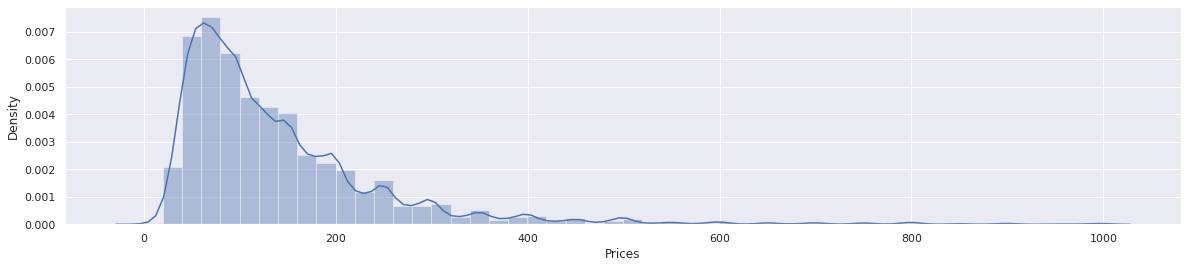

In [57]:
import seaborn as sns

sns.set_style('darkgrid')
# sns.distplot(listdf['price'])
sns.set(rc={'figure.figsize':(20,4)})
# plt.ylim(0, 4000)
# plt.xlim(0, 1000)
plt.xlabel('Prices')
plt.ylabel('Density')
prices=listdf.loc[listdf['price']<1000,['price']]
sns.distplot(prices, norm_hist=True)

#We conculde from the plot that 

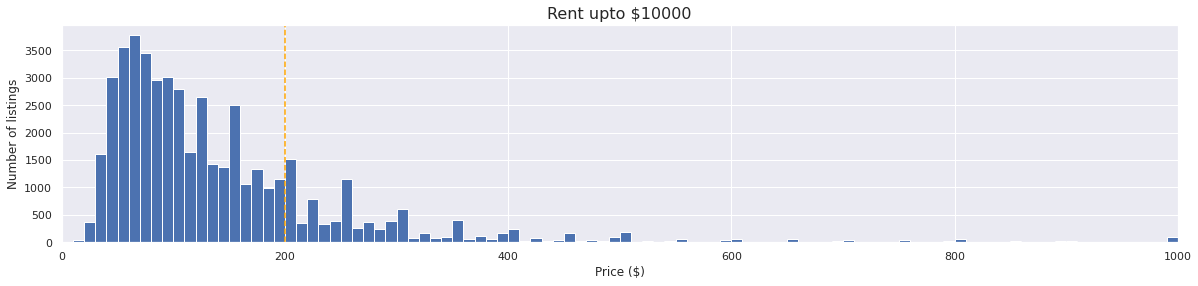

In [59]:
plt.figure(figsize=(20,4))
listdf.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Rent upto $10000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

In [60]:
listdf['amenities']
amenities=listdf['amenities']
amenities1=[a.replace(' ','_')for a in amenities]

l=[[word.strip('[" ]') for word in row[1:-1].split(',')] for row in amenities1]



In [61]:
sum(listdf['Heating'])

45120.0

In [63]:
import itertools
flat=itertools.chain.from_iterable(l)

In [64]:
text = " ".join(a for a in list(flat))

In [65]:
# list(flat)
len(text)

13718936

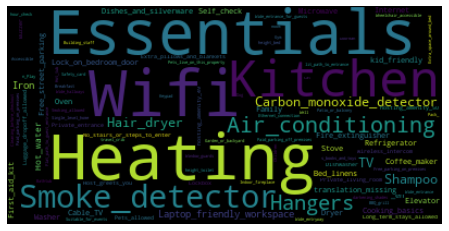

In [66]:
from wordcloud import WordCloud
# plt.subplots(figsize=(30,30))
wordcloud =WordCloud(collocations=False).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
avg_house=(listdf.loc[listdf['property_type']=='House','price']).mean()
count_house=(listdf.loc[listdf['property_type']=='House','price']).count()
avg_apartment=(listdf.loc[listdf['property_type']=='Apartment','price']).mean()
count_apartment=(listdf.loc[listdf['property_type']=='Apartment','price']).count()

avg_other=(listdf.loc[listdf['property_type']=='Other','price']).mean()
count_other=(listdf.loc[listdf['property_type']=='Other','price']).count()
print(avg_house,avg_apartment, avg_other)
print(count_house,count_apartment, count_other)

141.65172109443955 150.7224692774829 325.7687723480334
5665 41826 839


141.65172109443955 150.7224692774829


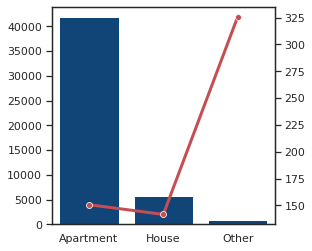

In [68]:
#Correct graph  Seaborn keeps ordering the x axis because of which graphs are wrong
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()

sns.lineplot(data = df_new_final,x = ['House','Apartment','Other'], y=[avg_house,avg_apartment,avg_other],
             color='r',
             marker="o",
             ax=ax2)
print(avg_house,avg_apartment)



sns.barplot(x = ['Apartment','House','Other'], y=[count_apartment,count_house,count_other],
            color='#004488',
            ax=ax1)


plt.show()
sns.set()

Median Price vs No. of Accomodate

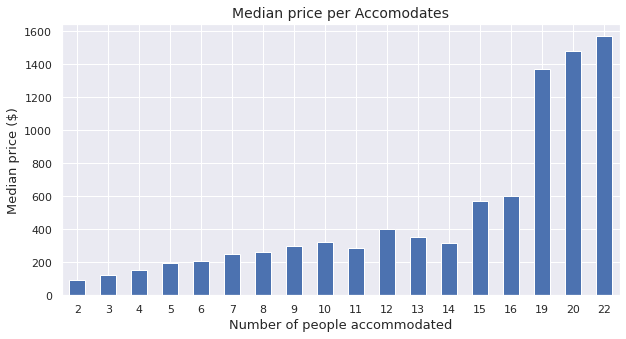

In [70]:
plt.figure(figsize=(10,5))
df_new_final.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price per Accomodates', fontsize=14)
plt.xlabel('Number of people accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Property Type

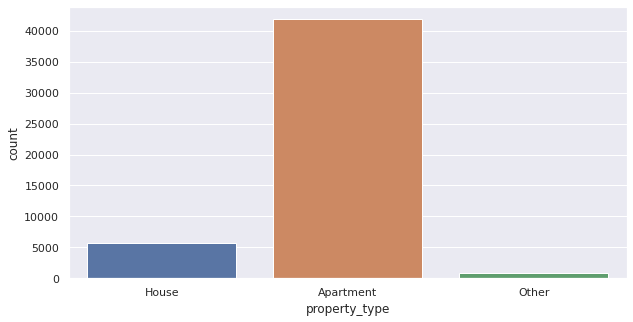

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_new_final, x = 'property_type')

In [72]:
df_new_final.groupby('property_type').price.mean()

property_type
Apartment    150.722469
House        141.651721
Other        325.768772
Name: price, dtype: float64

Room Type


In [73]:
df_new_final.room_type.value_counts()

Entire home/apt    24876
Private room       21828
Shared room         1191
Hotel room           435
Name: room_type, dtype: int64

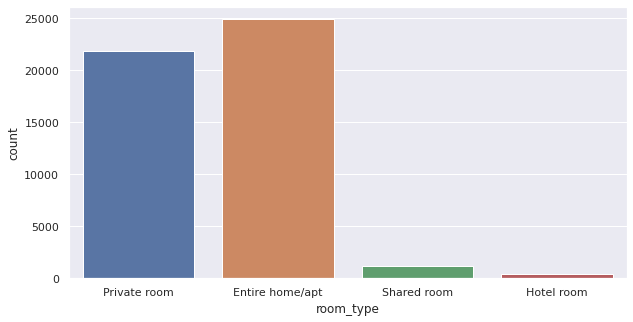

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_new_final, x = 'room_type') 

In [75]:
df_new_final.groupby('room_type').price.mean()

room_type
Entire home/apt    209.874980
Hotel room         235.694253
Private room        90.414468
Shared room         69.648195
Name: price, dtype: float64

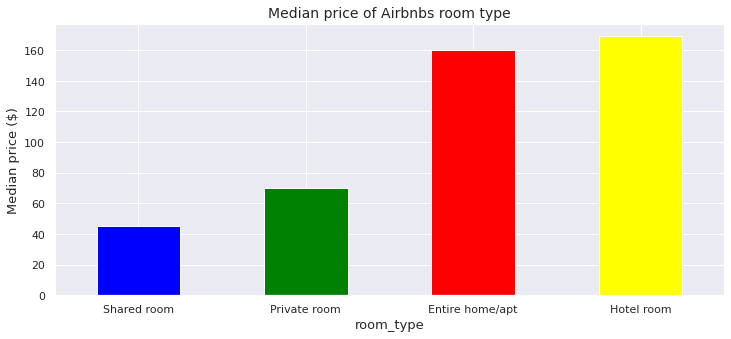

In [76]:
plt.figure(figsize=(12,5))
df_new_final.groupby('room_type').price.median().sort_values().plot(kind='bar',color = ['blue','green','red','yellow'])
plt.title('Median price of Airbnbs room type', fontsize=14)
plt.xlabel('room_type', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

Neighbourhood Group

In [77]:
df_new_final.neighbourhood_group_cleansed.value_counts()

Manhattan        21160
Brooklyn         19833
Queens            5852
Bronx             1126
Staten Island      359
Name: neighbourhood_group_cleansed, dtype: int64

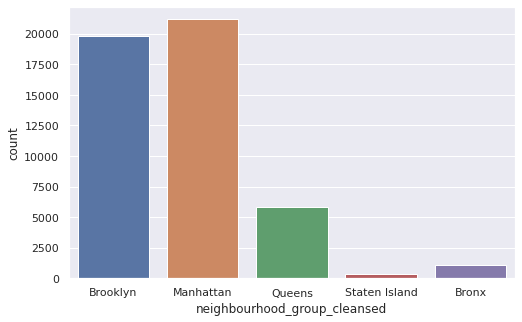

In [78]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(data = df_new_final, x = 'neighbourhood_group_cleansed')

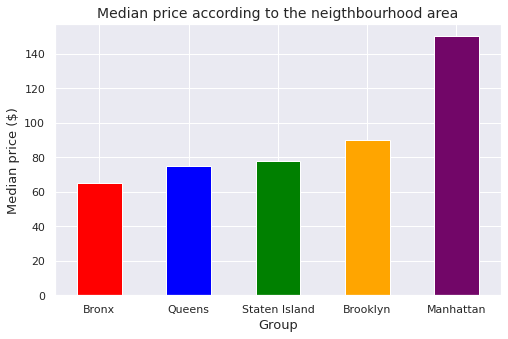

In [79]:
plt.figure(figsize=(8,5))
df_new_final.groupby('neighbourhood_group_cleansed').price.median().sort_values().plot(kind='bar',color = ['red','blue','green','orange','#720668'])
plt.title('Median price according to the neigthbourhood area', fontsize=14)
plt.xlabel('Group', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

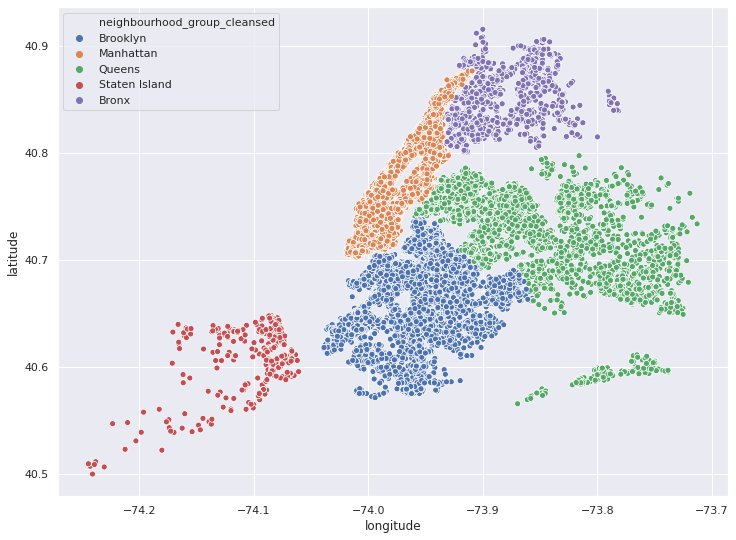

In [80]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_new_final.longitude,df_new_final.latitude,hue=df_new_final.neighbourhood_group_cleansed)
plt.ioff()

Price distribution based on the neighbourhood group

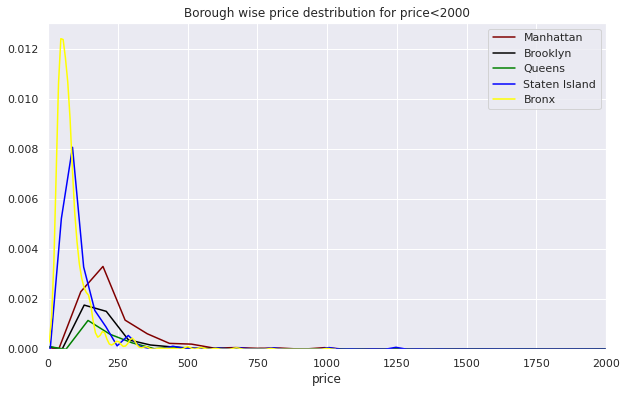

In [82]:
plt.figure(figsize=(10,6))
sns.distplot(df_new_final[df_new_final.neighbourhood_group_cleansed=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df_new_final[df_new_final.neighbourhood_group_cleansed=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df_new_final[df_new_final.neighbourhood_group_cleansed=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df_new_final[df_new_final.neighbourhood_group_cleansed=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(df_new_final[df_new_final.neighbourhood_group_cleansed=='Bronx'].price,color='yellow',hist=False,label='Bronx')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

In [83]:
df_new_final.host_identity_verified.value_counts()

f    25318
t    22991
0       21
Name: host_identity_verified, dtype: int64

In [84]:
df_new_final.host_identity_verified = df_new_final['host_identity_verified'].replace(0,'f')

In [85]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df_new_final.groupby(col).size().plot(kind='bar', ax=ax1, color=['red', 'green'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df_new_final.groupby(col).price.mean().plot(kind='bar', ax=ax2, color=['red', 'green'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

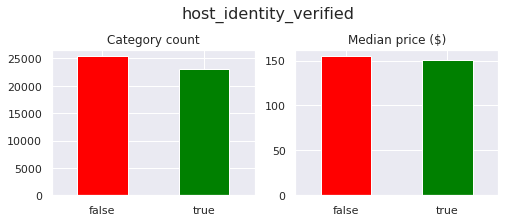

In [86]:
  binary_count_and_price_plot('host_identity_verified')

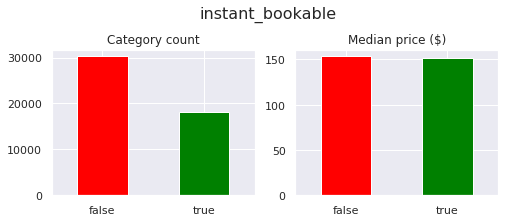

f    30282
t    18095
Name: instant_bookable, dtype: int64


In [87]:
binary_count_and_price_plot('instant_bookable')
print(df.instant_bookable.value_counts())  

In [88]:
df_new_final.cleaning_fee.dtype

dtype('O')

In [89]:
df_new_final['security_deposit'] = df_new_final['security_deposit'].astype(int)

In [90]:

df_new_final['cleaning_fee'] = df_new_final['cleaning_fee'].astype(int)

In [91]:
df_new_final.cleaning_fee.value_counts()

0      12328
50      3941
100     3609
25      2380
30      2366
       ...  
265        1
330        1
114        1
312        1
399        1
Name: cleaning_fee, Length: 209, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


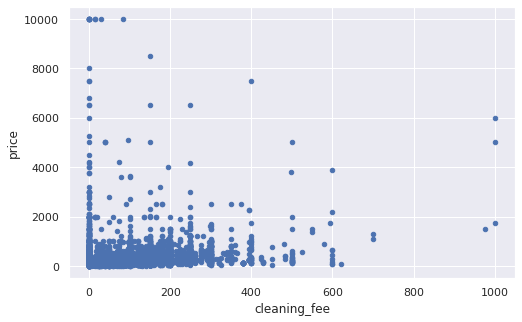

In [92]:
df_new_final.plot.scatter(x = 'cleaning_fee', y = 'price')

In [93]:
df_new_final.minimum_nights.describe()

count    48330.000000
mean         7.425450
std         21.651461
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

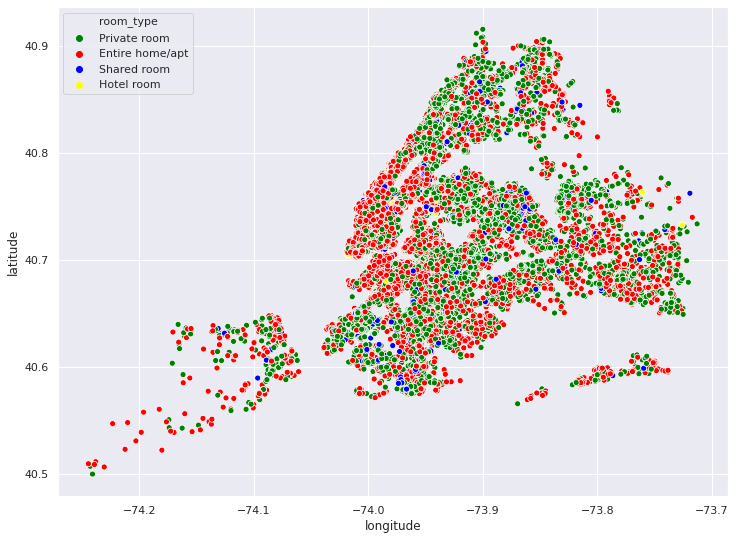

In [94]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_new_final.longitude,df_new_final.latitude,hue=df_new_final.room_type,palette = ['green','red','blue','yellow'])
plt.show()

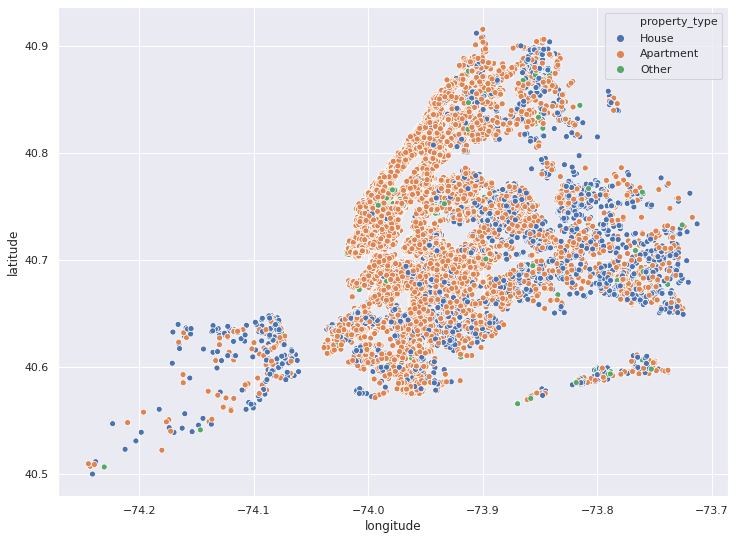

In [95]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_new_final.longitude,df_new_final.latitude,hue=df_new_final.property_type)
plt.ioff()

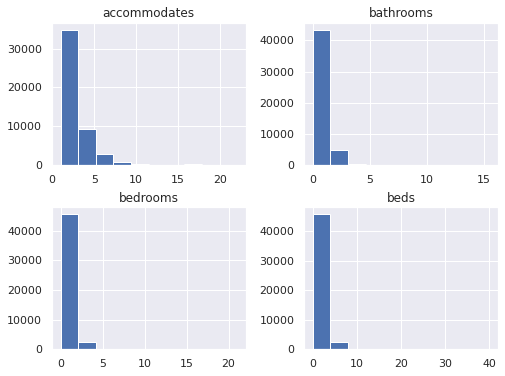

In [96]:
df_new_final[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

In [97]:
df_new_final.room_type.value_counts()

Entire home/apt    24876
Private room       21828
Shared room         1191
Hotel room           435
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

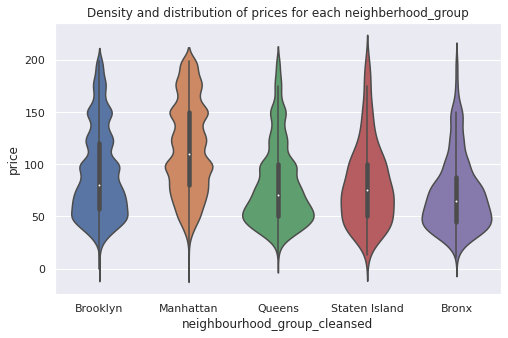

In [98]:
sub_6=df_new_final[df_new_final.price < 200]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [99]:
count=listdf.loc[listdf['price']<200,['price']].count()

count/len(listdf['price'])

price    0.801407
dtype: float64

Around 80% of the data is under $200 range.